In [1]:
#package imports
# UTILS

from datetime import datetime,time
import os
## PLOT
import matplotlib.pyplot as plt

import numpy as np


## ASTROPY
from astropy.io import fits
from astropy.time.core import Time, TimeDelta
from astropy.coordinates import SkyCoord
from sunpy.coordinates import get_body_heliographic_stonyhurst,HeliographicStonyhurst
import astropy.units as u

# File extraction

In [4]:
#files to be used
# SCI file - L4 spectrogram - STIX
sci_file = "data/solo_L1_stix-sci-xray-spec_20220830T020459-20220830T081003_V02_2208301654-61465.fits"

# Extract fits
hdulist = fits.open(sci_file)

### The header

In [5]:
# File header 

header = hdulist[0].header
header

# ACTIVITY
#  explore all of the hdulist indexes (0, 1, 2 ...)  
#  which index(es) have valuable information about the observation conditions?



SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
FILENAME= 'solo_L1_stix-sci-xray-spec_20220830T020459-20220830T081003_V02_2208&'
CONTINUE  '301654-61465.fits&'                                                  
CONTINUE  '' / FITS filename                                                    
RAW_FILE= 'LTP08_T09PM_REQ_BatchRequest.PktTmRaw.SOL.0.2022.210.05.23.24.834.J&'
CONTINUE  'EvW@2022.292.21.00.04.205.1.xml&'                                    
CONTINUE  '' / Raw filename(s)                                                  
PARENT  = 'solo_L0_stix-sci-xray-spec_0715140164-0715162068_V02_2208301654-614&'
CONTINUE  '65.fits&'                                                            
CONTINUE  '' / Source file c

# Ancillary data

In [6]:
# FILL THE SPACES "___FILL__" with the requested information from the file header

def print_obs_info(header):
    # observation invterval
    obs_start= header["DATE-BEG"]
    obs_end=header["DATE-END"]

    # distance to sun and time delay w.r.t. to sapcecraft (s/c)
    # distance (in meters) to AU
    dist_sun_sc= header["DSUN_OBS"]
    dist_sun_sc = (dist_sun_sc * u.m).to(u.AU)
    #delay in seconds
    time_delay = header["SUN_TIME"]
    time_delay = time_delay * u.s
    
    instrument = header["INSTRUME"]
    observatory = header["OBSRVTRY"]
    
    print(f"Observatory: {observatory}")
    print(f"Instrument: {instrument}")
    print(f"Observation time:\n from: {obs_start}\n to: {obs_end}")
    print(f"Distance s/c - sun: {dist_sun_sc}")
    print(f"Time delay s/c - sun: {time_delay}")
    
    
    


In [7]:
print_obs_info(header)

Observatory: Solar Orbiter
Instrument: STIX
Observation time:
 from: 2022-08-30T02:04:59.812
 to: 2022-08-30T08:10:03.650
Distance s/c - sun: 0.764934298901394 AU
Time delay s/c - sun: 381.705874472152 s


### Spacecraft position

In [8]:
# FILL in the requested fields "___fILL__"
def plot_sc_position(header):
 
    obs_start=header['DATE-BEG'] # observation date
    observatory = header["OBSRVTRY"] # observatory
    obstime =Time(obs_start, format='fits') #fits time format = "%Y-%m-%dT%H:%M:%S"
    dist_sun_sc=(header["DSUN_OBS"]*u.m).to(u.au)

    #getting heliographic stonyhurst coordinates - longitude and latitude
    
    #longitude (degrees)
    sc_lon = header["HGLN_OBS"]
    sc_lon = sc_lon * u.deg
    
    #latitude
    sc_lat = header["HGLT_OBS"]
    sc_lat = sc_lat*u.deg
    
    # get coordiantes  
    solo_coords=HeliographicStonyhurst(sc_lon,sc_lat, dist_sun_sc, obstime=obs_start)
    
    #planets to display
    planet_list = [  'mercury','sun','earth','venus']
    planet_coord = [get_body_heliographic_stonyhurst(this_planet, time=obstime) for this_planet in planet_list]
    
    #append satellite
    planet_list.append(observatory)
    planet_coord.append(solo_coords)


    # PLOT - projection of positions over ecliptic plane
    fig = plt.figure(figsize=(5,5))
    ax1 = plt.subplot(1, 1, 1, projection='polar')
    # plot positions over the ecliptic plane in polar coordinates
    for this_planet, this_coord in zip(planet_list, planet_coord):
        markerr = '^' if this_planet== observatory else 'o'
        plt.plot(np.deg2rad(this_coord.lon), this_coord.radius, markerr, label=this_planet)
        plt.text(np.deg2rad(this_coord.lon.value), this_coord.radius.value,this_planet+"  ",
                 horizontalalignment='right',verticalalignment='center',fontweight="demibold")

    #Formatting observation time for title 
    obstime_formatted = (obstime.to_datetime()).strftime("%d-%b-%Y %H:%M")

    plt.title(observatory+" position for "+obstime_formatted,fontweight="demibold")
    plt.show()


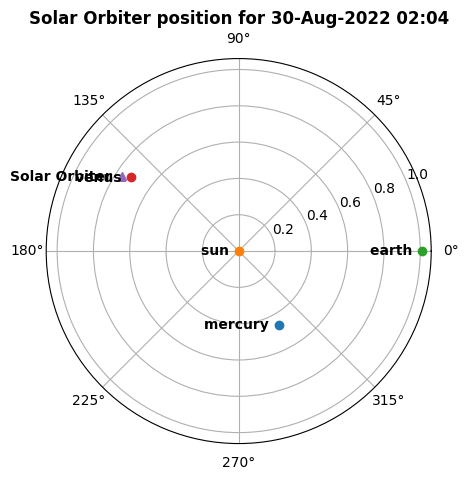

In [9]:
plot_sc_position(header)

### To think...
Given that there are spacecrafts around the earth and mercury capable of performing solar and heliospheric observations, how do you think the observed configuration is advantageous for observing heliophyiscal phenomena?


### Remark
With the tool **SOLAR-MACH** you can visualize the position (over the ecliptic plane) of Solar Orbiter, the STEREO A and B, and other spacecrafts along with the planets for any given time.

website: https://solar-mach.github.io/